<a href="https://colab.research.google.com/github/alexitiko/alexitiko/blob/main/AnalisisDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Analisis de datos
import numpy as np
import statistics # estadisticas matematicas
import matplotlib.pyplot as plt #plot
import plotly.express as px #Crear figuras enteras
import seaborn as sns #data visals

In [ ]:
print(type(9))
print(type(9.3))
print(type("Juan"))
print(type(False))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>


In [ ]:
alex = 1+3


In [ ]:
rachel = 1.5 + 2.5

In [ ]:
'Alex'+ ' ' +'Rachel'

'Alex Rachel'

In [ ]:
alex + rachel

8.0

In [ ]:
rachel

4.0

# Listas y tuplas

In [ ]:
variable = 14

In [ ]:
tuple = (alex,rachel,14)
type(tuple)
tuple

(4, 4.0, 14)

In [ ]:
list = [alex,rachel,variable]
list

[4, 4.0, 14]

In [ ]:
print(tuple)
print(list)

(4, 4.0, 14)
[4, 4.0, 14]


In [ ]:
tienda = ('Cartas','Juegos','Juguetes')
precios = (20,30,50)

In [ ]:
print(tienda)
print(precios)

('Cartas', 'Juegos', 'Juguetes')
(20, 30, 50)


In [ ]:
precios[0] = 20



In [ ]:
tienda = ['Cartas','Juegos','Juguetes']
precios = [20,30,50]

In [ ]:
print(tienda)
print(precios)

['Cartas', 'Juegos', 'Juguetes']
[20, 30, 50]


DataFrame (Marco de datos)


In [ ]:
tienda = ['Cartas','Juegos','Juguetes']
precios = [20,30,50]
DataFrame = pd.DataFrame(zip(tienda,precios), columns = ['Productos', 'Precios'])

In [ ]:
DataFrame

,Productos,Precios
0,Cartas,20
1,Juegos,30
2,Juguetes,50


import numpy as np
from google.colab import autoviz
df_3096939706108489970 = autoviz.get_registered_df('df_3096939706108489970')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3096939706108489970, *['Precios'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3096939706108489970 = autoviz.get_registered_df('df_3096939706108489970')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3096939706108489970, *['Precios'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3096939706108489970 = autoviz.get_registered_df('df_3096939706108489970')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3096939706108489970, *['Productos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3096939706108489970 = autoviz.get_registered_df('df_3096939706108489970')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3096939706108489970, *['Precios', 'Productos'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3096939706108489970 = autoviz.get_registered_df('df_3096939706108489970')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3096939706108489970, *['Precios', 'count()', 'Productos'], **{})
chart

In [ ]:
DataFrame.loc[3] = ['Mangas', 40]
DataFrame

,Productos,Precios
0,Cartas,20
1,Juegos,30
2,Juguetes,50
3,Mangas,40


In [ ]:
DataFrame['Stock'] = [12,10,22,5]
DataFrame

,Productos,Precios,Stock
0,Cartas,20,12
1,Juegos,30,10
2,Juguetes,50,22
3,Mangas,40,5


Data Wrangling (Disputa de datos)

Limpieza de datos
Duplicados      Nulos      Valores atipicos




In [ ]:
#https://drive.google.com/file/d/1_drjUORvI3qKlPT67busbAoXJrUk795T/view?usp=drive_link
url = "https://drive.google.com/uc?id="
data ='1_drjUORvI3qKlPT67busbAoXJrUk795T'
df_psy = pd.read_csv(url+data)

In [ ]:
df_psy

,Person,age,married,orientation,religion,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,1,16,Never,Hetero,Other,1.0,7.0,7.0,7.0,7.0,5.0,1.0,4.0,2.0,4.0,4.0
1,2,16,Never,New Types,Christian Other,6.0,4.0,7.0,4.0,7.0,7.0,1.0,4.0,2.0,4.0,4.0
2,3,17,Never,Homo,Christian,2.0,2.0,2.0,6.0,5.0,5.0,3.0,3.0,4.0,3.0,4.0
3,4,13,Never,New Types,Christian,1.0,7.0,4.0,4.0,6.0,1.0,6.0,2.0,2.0,2.0,1.0
4,5,19,Never,Hetero,Muslim,2.0,3.0,6.0,5.0,5.0,6.0,3.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39774,39772,21,Never,New Types,Muslim,4.0,5.0,7.0,6.0,4.0,7.0,4.0,3.0,3.0,4.0,4.0
39775,39773,48,Married,Hetero,Christian Other,6.0,7.0,5.0,3.0,6.0,1.0,5.0,2.0,2.0,1.0,2.0
39776,39774,20,Never,Hetero,Protestant,1.0,5.0,7.0,5.0,3.0,5.0,3.0,3.0,2.0,4.0,4.0
39777,39775,26,Never,Hetero,Muslim,6.0,3.0,5.0,3.0,5.0,5.0,1.0,2.0,2.0,1.0,3.0


1) Quitar la columna persona
2) Quitar datos nulos
3) Quitar valores duplicados
4) Quitar valores atipicos
5) Quitar las variables cualitativas

In [ ]:
#drop
df_psy = df_psy.drop(df_psy.columns[0], axis = 1)
df_psy

,age,married,orientation,religion,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,16,Never,Hetero,Other,1.0,7.0,7.0,7.0,7.0,5.0,1.0,4.0,2.0,4.0,4.0
1,16,Never,New Types,Christian Other,6.0,4.0,7.0,4.0,7.0,7.0,1.0,4.0,2.0,4.0,4.0
2,17,Never,Homo,Christian,2.0,2.0,2.0,6.0,5.0,5.0,3.0,3.0,4.0,3.0,4.0
3,13,Never,New Types,Christian,1.0,7.0,4.0,4.0,6.0,1.0,6.0,2.0,2.0,2.0,1.0
4,19,Never,Hetero,Muslim,2.0,3.0,6.0,5.0,5.0,6.0,3.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39774,21,Never,New Types,Muslim,4.0,5.0,7.0,6.0,4.0,7.0,4.0,3.0,3.0,4.0,4.0
39775,48,Married,Hetero,Christian Other,6.0,7.0,5.0,3.0,6.0,1.0,5.0,2.0,2.0,1.0,2.0
39776,20,Never,Hetero,Protestant,1.0,5.0,7.0,5.0,3.0,5.0,3.0,3.0,2.0,4.0,4.0
39777,26,Never,Hetero,Muslim,6.0,3.0,5.0,3.0,5.0,5.0,1.0,2.0,2.0,1.0,3.0


In [ ]:
#Duplicados
duplicado = sum(df_psy.duplicated())
print(duplicado/ len(df_psy.index))

0.0004022222780864275


In [ ]:
mostrar = df_psy[df_psy.duplicated()]
mostrar

,age,married,orientation,religion,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
5840,20,Never,Hetero,Muslim,4.0,7.0,1.0,5.0,6.0,1.0,6.0,1.0,1.0,1.0,1.0
5958,19,Never,New Types,Muslim,5.0,6.0,7.0,7.0,7.0,7.0,4.0,4.0,3.0,2.0,4.0
8778,20,Never,New Types,Muslim,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
13331,18,Never,Hetero,Muslim,1.0,1.0,7.0,7.0,7.0,7.0,1.0,4.0,4.0,4.0,4.0
19915,23,Never,Hetero,Muslim,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
23087,18,Never,Hetero,Muslim,1.0,1.0,7.0,7.0,7.0,7.0,1.0,4.0,4.0,4.0,4.0
23201,18,Never,Hetero,Muslim,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
24848,22,Never,New Types,Muslim,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
26074,28,Never,Hetero,Muslim,6.0,6.0,5.0,4.0,6.0,5.0,6.0,2.0,1.0,1.0,2.0
28382,18,Never,New Types,Muslim,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0


In [ ]:
df_psy =df_psy.drop_duplicates()

In [ ]:
duplicado = sum(df_psy.duplicated())
duplicado

0

In [ ]:
df_psy

,age,married,orientation,religion,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,16,Never,Hetero,Other,1.0,7.0,7.0,7.0,7.0,5.0,1.0,4.0,2.0,4.0,4.0
1,16,Never,New Types,Christian Other,6.0,4.0,7.0,4.0,7.0,7.0,1.0,4.0,2.0,4.0,4.0
2,17,Never,Homo,Christian,2.0,2.0,2.0,6.0,5.0,5.0,3.0,3.0,4.0,3.0,4.0
3,13,Never,New Types,Christian,1.0,7.0,4.0,4.0,6.0,1.0,6.0,2.0,2.0,2.0,1.0
4,19,Never,Hetero,Muslim,2.0,3.0,6.0,5.0,5.0,6.0,3.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39773,16,Never,Asexual,Atheist,2.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,4.0
39774,21,Never,New Types,Muslim,4.0,5.0,7.0,6.0,4.0,7.0,4.0,3.0,3.0,4.0,4.0
39775,48,Married,Hetero,Christian Other,6.0,7.0,5.0,3.0,6.0,1.0,5.0,2.0,2.0,1.0,2.0
39776,20,Never,Hetero,Protestant,1.0,5.0,7.0,5.0,3.0,5.0,3.0,3.0,2.0,4.0,4.0


In [ ]:
#Nulos
display(df_psy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39779 entries, 0 to 39778
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Person       39779 non-null  int64  
 1   age          39779 non-null  int64  
 2   married      39779 non-null  object 
 3   orientation  39778 non-null  object 
 4   religion     39777 non-null  object 
 5   Q1           39777 non-null  float64
 6   Q2           39774 non-null  float64
 7   Q3           39775 non-null  float64
 8   Q4           39777 non-null  float64
 9   Q5           39775 non-null  float64
 10  Q6           39775 non-null  float64
 11  Q7           39775 non-null  float64
 12  Q8           39774 non-null  float64
 13  Q9           39775 non-null  float64
 14  Q10          39776 non-null  float64
 15  Q11          39777 non-null  float64
dtypes: float64(11), int64(2), object(3)
memory usage: 4.9+ MB


None

In [ ]:
null = df_psy[df_psy.isna().any(axis=1)]
null

,age,married,orientation,religion,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
90,15,Never,New Types,NaN,1.0,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,4.0,4.0
137,20,Never,Hetero,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,24,Never,Homo,Hindu,5.0,NaN,4.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
225,19,Never,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,3.0,NaN,2.0,NaN,3.0
257,15,Never,Homo,Jewish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0


In [ ]:
#Drop na values
df_psy = df_psy.dropna()
df_psy

,age,married,orientation,religion,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,16,Never,Hetero,Other,1.0,7.0,7.0,7.0,7.0,5.0,1.0,4.0,2.0,4.0,4.0
1,16,Never,New Types,Christian Other,6.0,4.0,7.0,4.0,7.0,7.0,1.0,4.0,2.0,4.0,4.0
2,17,Never,Homo,Christian,2.0,2.0,2.0,6.0,5.0,5.0,3.0,3.0,4.0,3.0,4.0
3,13,Never,New Types,Christian,1.0,7.0,4.0,4.0,6.0,1.0,6.0,2.0,2.0,2.0,1.0
4,19,Never,Hetero,Muslim,2.0,3.0,6.0,5.0,5.0,6.0,3.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39773,16,Never,Asexual,Atheist,2.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,4.0
39774,21,Never,New Types,Muslim,4.0,5.0,7.0,6.0,4.0,7.0,4.0,3.0,3.0,4.0,4.0
39775,48,Married,Hetero,Christian Other,6.0,7.0,5.0,3.0,6.0,1.0,5.0,2.0,2.0,1.0,2.0
39776,20,Never,Hetero,Protestant,1.0,5.0,7.0,5.0,3.0,5.0,3.0,3.0,2.0,4.0,4.0


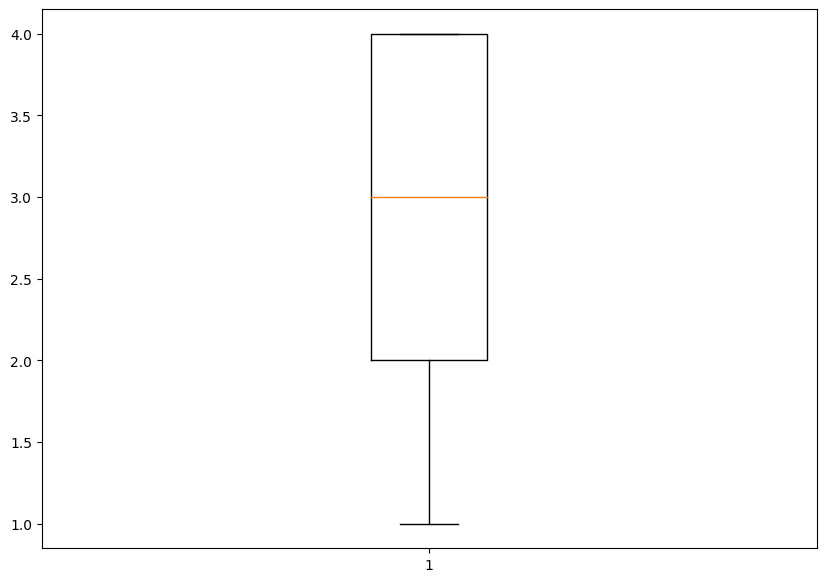

In [ ]:
var = df_psy['Q8']
fig = plt.figure(figsize=(10,7))
plt.boxplot(var)
plt.show()

px.box(var, points = 'all')

In [ ]:
num = df_psy.drop(['married','orientation','religion'], axis=1)
fig = px.box(num.melt(), y = "value", facet_col= 'variable', boxmode= 'overlay', color= 'variable')
fig.update_yaxes(matches=None)

In [ ]:
maxage = num['age'].max()
maxage

1998

In [ ]:
Maxage = num[num['age']>100]
Maxage

,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
5342,223,7.0,6.0,3.0,2.0,1.0,2.0,6.0,2.0,1.0,1.0,1.0
10233,1996,5.0,7.0,7.0,7.0,5.0,3.0,5.0,4.0,4.0,3.0,4.0
14238,117,3.0,1.0,7.0,6.0,3.0,6.0,2.0,4.0,3.0,4.0,3.0
21385,1998,1.0,1.0,6.0,7.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
24900,115,5.0,3.0,6.0,6.0,5.0,6.0,2.0,3.0,2.0,1.0,2.0
30029,1993,4.0,7.0,7.0,7.0,7.0,6.0,2.0,4.0,4.0,3.0,4.0
33732,1991,2.0,7.0,7.0,5.0,6.0,6.0,2.0,3.0,3.0,3.0,4.0


# Ejercicios numpy



In [1]:
import numpy as np

# Array de 1 dimension
# 1D Array
array = np.array([1,2,3])
array

array([1, 2, 3])

In [2]:
# Linspace function
# Funcion de espacio lineal
np.linspace(0,50,51)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [4]:
#Organizar la funcion
# Arrange function
np.arange(0,51)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [6]:
# 2 d array
# Array de 2 dimensiones
arr_bis = np.array([[1,2,3],
                    [4,5,6], # RECUERDA LAS COMAS
                    [7,8,9]])
arr_bis

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
# Matriz nula
# Null matrix
O = np.zeros([3,5])
O

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [9]:
# Identity matrix
# Matriz de identidad
I = np.identity(5)
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [11]:
# Matrices de uno
# Ones matrix
One = np.ones([3,5])
One

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
# Add two matrix


|